In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

## 마켓컬리

### 데이터

In [2]:
kurly=pd.read_csv('./data/kurly_classify_allergy_gluten.csv',encoding='utf-8')
kurly

,category,brand,item,allergy,ingredient,classify,gluten
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...","고등어,아황산류,메밀,옥수수유옥수수,복숭아,오징어,홍합포함,설탕,조개류,전복,대두,...",general,발견사항 없음
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...","조개류,정제소금,주정,떡류,조기,소스소스,참치,비타민,가공소금,오징어,구연산,복합조...",pesco,발견사항 없음
2,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...","마늘,조개류,전복,내두유,콩기름,홍합포함",pesco,발견사항 없음
3,국/반찬/메인 요리,치즈룸x테이스팅룸,전복 솥밥 리조또,"전복미역밥,우유,조개류,전복,전복내장크림소스,대두,밀,우유,계란,닭고기,조개류,굴,...","마늘,고등어,호두,유청,소고기,껏일,포도당,구연산,가공이크림,토코페롤,변성전분,주정...",general,발견사항 없음
4,국/반찬/메인 요리,피코크,금돼지식당 통삽겹김치찌개,"대두,밀,돼지고기,쇠고기,알류,우유,메밀,땅콩,고등어,게,새우,복숭아,토마토,아황산...","마늘,고등어,향미증진제,콜산,호두,복숭아,홍합포함,인산이전분,닭고기,고춧가루,진한양...",general,발견사항 없음
...,...,...,...,...,...,...,...
2925,간식/과자/떡,라라스윗,발렌타인 기프트 세트,"우유,밀,계란,대두,땅콩,호두,메밀,복숭아,토마토,돼지고기","알룰로스,당류",vegan,발견사항 없음
2926,간식/과자/떡,발스낵,그랜드 감자칩 2묶음 6종 (택1),"씨솔트,와사비,칠리앤드라임,사우어크림앤드어니언,밀,우유,샐러리,겨자,사워크림앤허브,...","글루,정제소금,오일,고추냉이,정제수정제소금,감자플레이크,리브뉴클레오티드이나트롬,감자...",vegan,발견사항 없음
2927,간식/과자/떡,리터 스포트,미니 초콜릿믹스 9P,없음,"준초콜릿,옥수수",vegan,발견사항 없음
2928,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유",vegan,발견사항 없음


In [3]:
for idx,text in enumerate(kurly['allergy']):
    text=text.replace('혼입가능','')
    text=text.replace('(',',')
    text=text.replace(')',',')
    text=re.sub(',+',',',text)
    kurly['allergy'][idx]=text

### 성분리스트

In [4]:
kurly_ingredient=pd.read_csv('./data/컬리 성분 정리표_final.csv',encoding='cp949')
kurly_meat=kurly_ingredient.loc[kurly_ingredient['분류']=='육류','성분'].tolist()
with open("./list/meat.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_meat.append(word)

meat_lst=[]
for word in kurly_meat:
    word=word.replace(' ','')
    meat_lst.append(word)

meat_lst=list(set(meat_lst))
len(meat_lst)

279

In [5]:
kurly_ingredient=pd.read_csv('./data/컬리 성분 정리표_final.csv',encoding='cp949')
kurly_sea=kurly_ingredient.loc[kurly_ingredient['분류']=='해산물','성분'].tolist()
with open("./list/sea.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_sea.append(word)

sea_lst=[]
for word in kurly_sea:
    word=word.replace(' ','')
    sea_lst.append(word)

sea_lst=list(set(sea_lst))
len(sea_lst)

2166

In [6]:
kurly_milk=kurly_ingredient.loc[kurly_ingredient['분류']=='유제품','성분'].tolist()
with open("./list/milk.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_milk.append(word)

milk_lst=[]
for word in kurly_milk:
    word=word.replace(' ','')
    milk_lst.append(word)

milk_lst=list(set(milk_lst))
len(milk_lst)

115

In [7]:
kurly_egg=kurly_ingredient.loc[kurly_ingredient['분류']=='달걀','성분'].tolist()
with open("./list/egg.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_egg.append(word)

egg_lst=[]
for word in kurly_egg:
    word=word.replace(' ','')
    egg_lst.append(word)

egg_lst=list(set(egg_lst))
len(egg_lst)

33

In [8]:
milk_egg_lst=milk_lst+egg_lst
len(milk_egg_lst)

148

### 비건 단계당 가장 많이 등장하는 성분들

general

In [9]:
general=[]
for text in kurly.loc[kurly['classify']=='general','ingredient']:
    text=text.replace("'",'')
    for word in text.split(','):
        if word in meat_lst:
            general.append(word.strip())

(-0.5, 255.5, 255.5, -0.5)

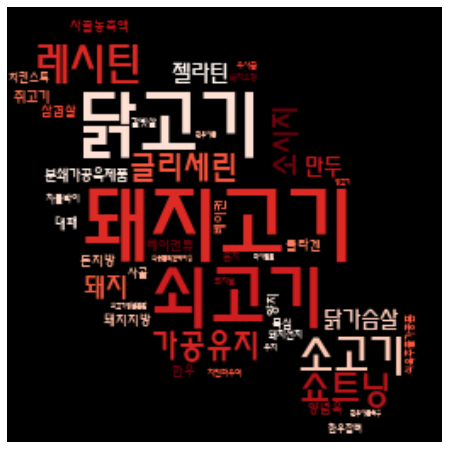

In [10]:
general=Counter(general)
img = Image.open('./img/고기.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='Reds',mask=img_array,max_words=1000).generate_from_frequencies(general)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

pesco

In [11]:
pesco=[]
for text in kurly.loc[kurly['classify']=='pesco','ingredient']:
    text=text.replace("'",'')
    for word in text.split(','):
        if word in sea_lst:
            pesco.append(word.strip())

(-0.5, 224.5, 224.5, -0.5)

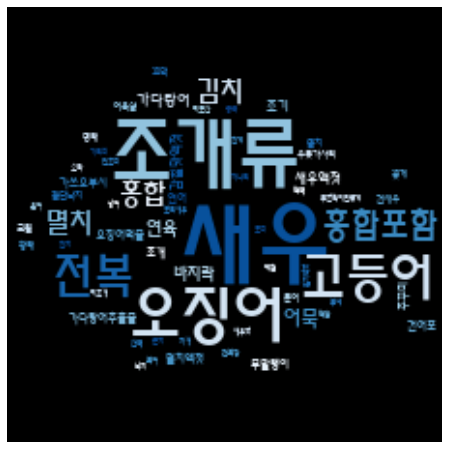

In [12]:
pesco=Counter(pesco)
img = Image.open('./img/물고기.jpg')
img_array = np.array(img)

wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='Blues',mask=img_array,max_words=1000).generate_from_frequencies(pesco)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

lacto_ovo

In [13]:
lacto_ovo=[]
for text in kurly.loc[kurly['classify']=='lacto_ovo','ingredient']:
    text=text.replace("'",'')
    for word in text.split(','):
        if word in milk_egg_lst:
            lacto_ovo.append(word.strip())

(-0.5, 266.5, 329.5, -0.5)

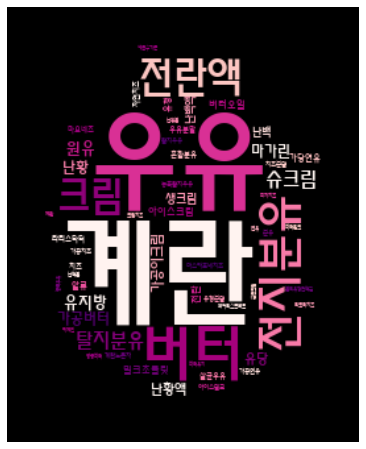

In [14]:
lacto_ovo=Counter(lacto_ovo)
img = Image.open('./img/우유.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='RdPu',mask=img_array,max_words=1000).generate_from_frequencies(lacto_ovo)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

lacto

In [15]:
lacto=[]
for text in kurly.loc[kurly['classify']=='lacto','ingredient']:
    text=text.replace("'",'')
    for word in text.split(','):
        if word in milk_lst:
            lacto.append(word.strip())

(-0.5, 237.5, 237.5, -0.5)

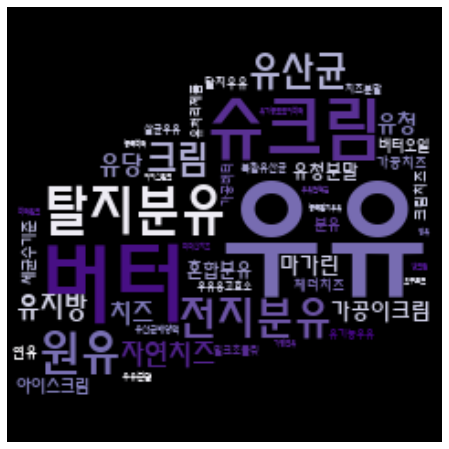

In [16]:
lacto=Counter(lacto)
img = Image.open('./img/치즈.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='Purples',mask=img_array,max_words=1000).generate_from_frequencies(lacto)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

ovo

In [17]:
ovo=[]
for text in kurly.loc[kurly['classify']=='ovo','ingredient']:
    text=text.replace("'",'')
    for word in text.split(','):
        if word in egg_lst:
            ovo.append(word.strip())

(-0.5, 204.5, 239.5, -0.5)

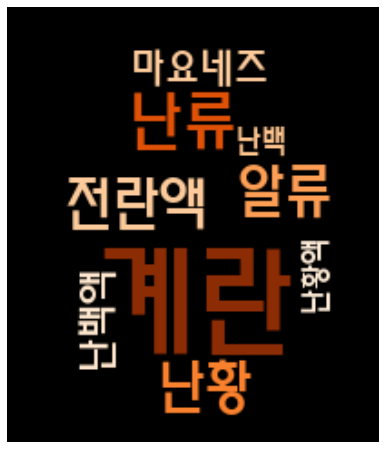

In [18]:
ovo=Counter(ovo)
img = Image.open('./img/달걀.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='Oranges',mask=img_array,max_words=1000).generate_from_frequencies(ovo)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

vegan

In [19]:
vegan=[]
for text in kurly.loc[kurly['classify']=='vegan','ingredient']:
    text=text.replace("'",'')
    for word in text.split(','):
        vegan.append(word)
vegan=Counter(vegan)

(-0.5, 639.5, 639.5, -0.5)

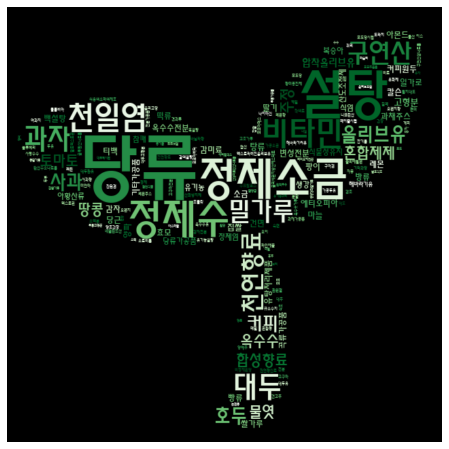

In [20]:
img = Image.open('./img/새싹.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='Greens',mask=img_array,max_words=1000).generate_from_frequencies(vegan)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

### 비건 식품 단계별 개수

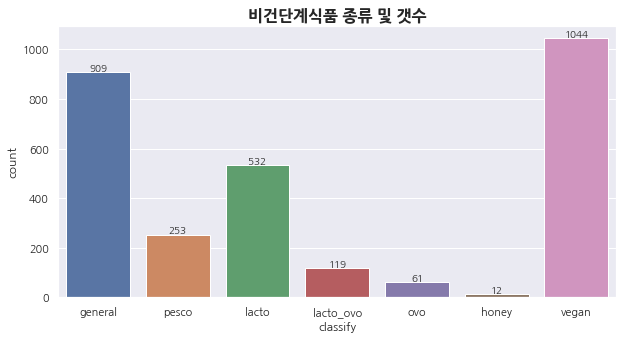

In [64]:
plt.figure(figsize=(10,5))
title_font={'fontsize':16,'fontweight':'bold'}
plt.title('비건단계식품 종류 및 갯수',fontdict=title_font)
ax=sns.countplot(x='classify',data=kurly)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

### 성분개수

In [4]:
def get_len(text):
    return len(text.split(','))

kurly['ingredient_cnt']=kurly['ingredient'].apply(get_len)
ingredient_cnt=Counter(kurly['ingredient_cnt'])

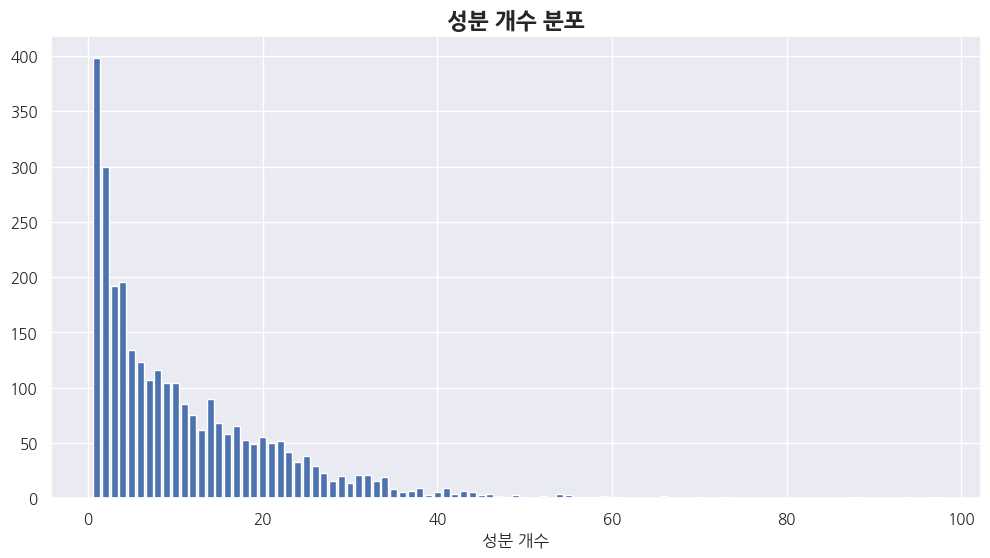

In [7]:
plt.figure(figsize=(12,6))
plt.title('성분 개수 분포',fontdict=title_font)
plt.bar(ingredient_cnt.keys(),ingredient_cnt.values())
plt.xlabel('성분 개수')
plt.show()

### 카테고리별 비건식품 갯수

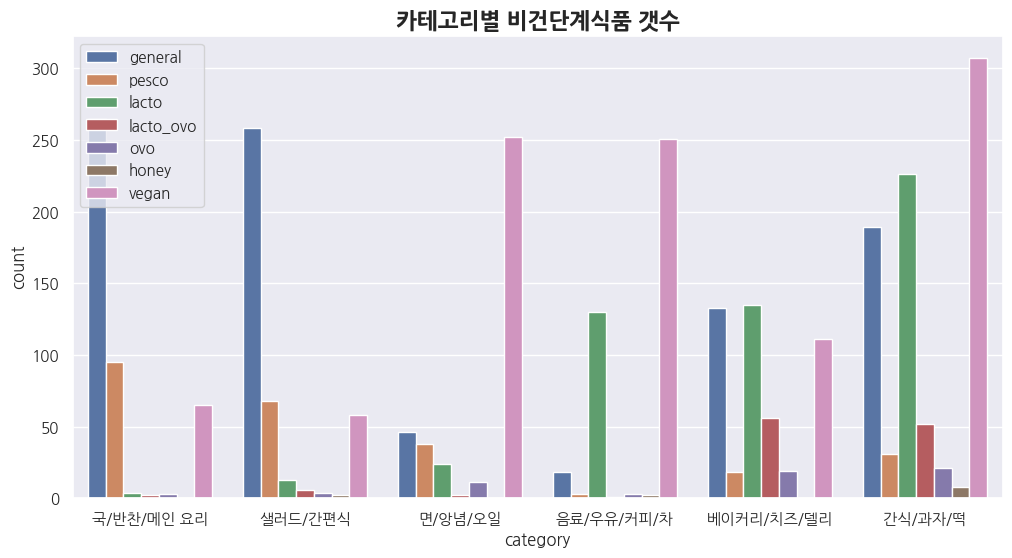

In [6]:
sns.set(font='NanumGothic')
plt.figure(figsize=(12,6))
title_font={'fontsize':16,'fontweight':'bold'}
plt.title('카테고리별 비건단계식품 갯수',fontdict=title_font)
sns.countplot(x='category',hue='classify',data=kurly)
plt.legend(loc='best')

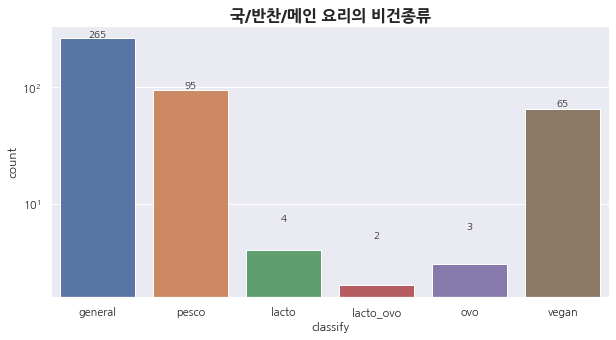

In [25]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.title('국/반찬/메인 요리의 비건종류',fontdict=title_font)
ax=sns.countplot(x='classify',data=kurly[kurly['category']=='국/반찬/메인 요리'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()


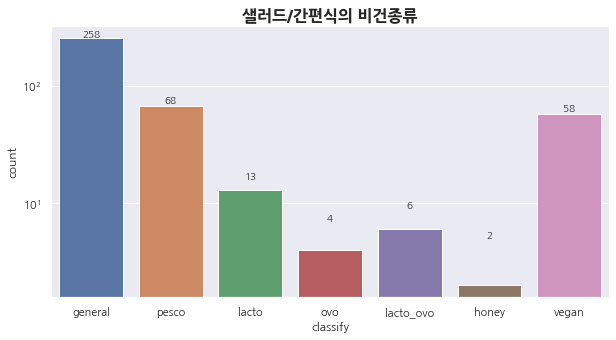

In [26]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.title('샐러드/간편식의 비건종류',fontdict=title_font)
ax=sns.countplot(x='classify',data=kurly[kurly['category']=='샐러드/간편식'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()


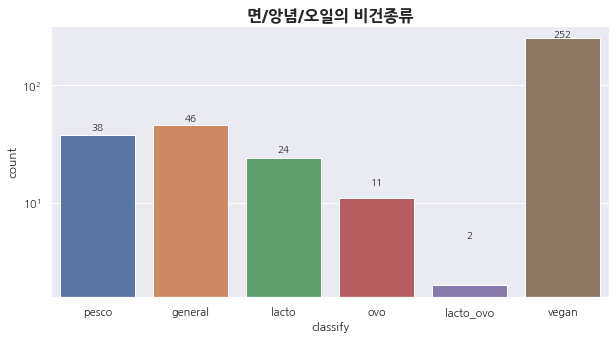

In [27]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.title('면/앙념/오일의 비건종류',fontdict=title_font)
ax=sns.countplot(x='classify',data=kurly[kurly['category']=='면/앙념/오일'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

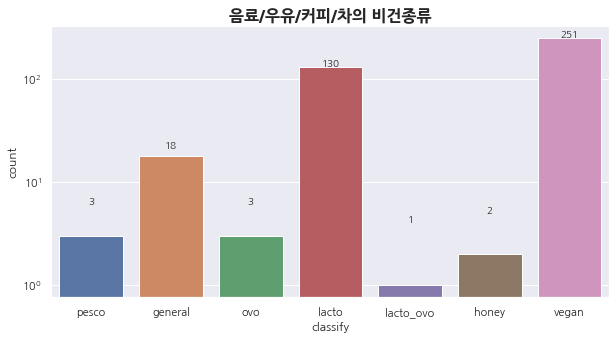

In [28]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.title('음료/우유/커피/차의 비건종류',fontdict=title_font)
ax=sns.countplot(x='classify',data=kurly[kurly['category']=='음료/우유/커피/차'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

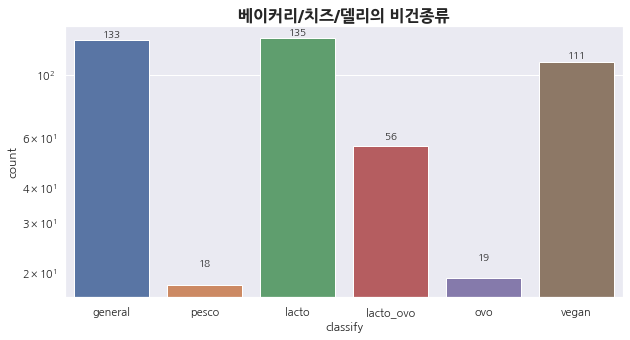

In [29]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.title('베이커리/치즈/델리의 비건종류',fontdict=title_font)
ax=sns.countplot(x='classify',data=kurly[kurly['category']=='베이커리/치즈/델리'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

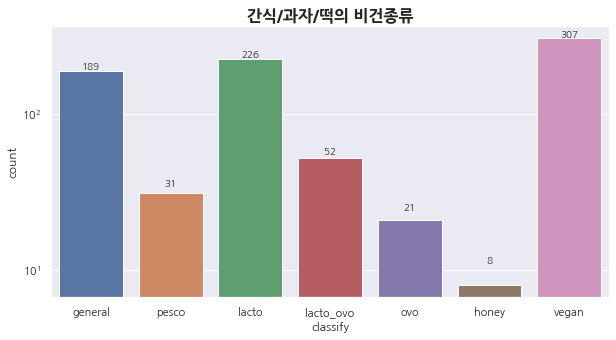

In [30]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.title('간식/과자/떡의 비건종류',fontdict=title_font)
ax=sns.countplot(x='classify',data=kurly[kurly['category']=='간식/과자/떡'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

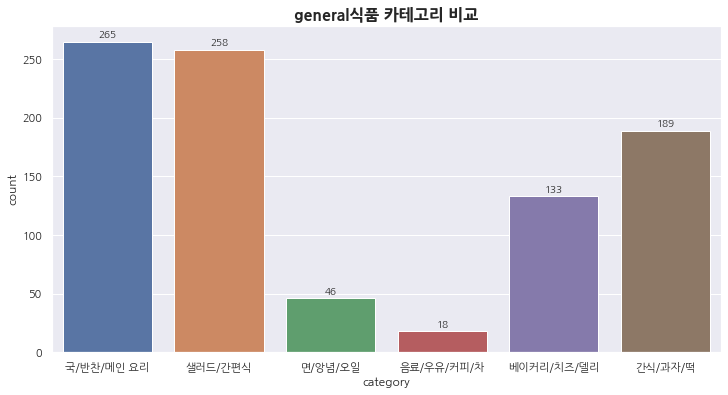

In [31]:
general_df=kurly[kurly['classify']=='general']
plt.figure(figsize=(12,6))
plt.title('general식품 카테고리 비교',fontdict=title_font)
ax=sns.countplot(x='category',data=general_df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

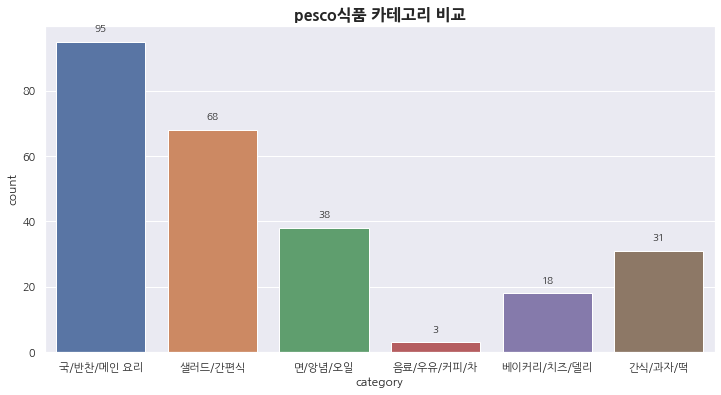

In [32]:
pesco_df=kurly[kurly['classify']=='pesco']
plt.figure(figsize=(12,6))
plt.title('pesco식품 카테고리 비교',fontdict=title_font)
ax=sns.countplot(x='category',data=pesco_df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

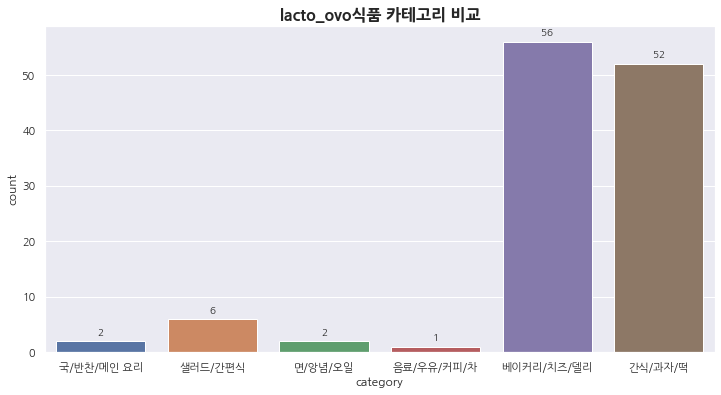

In [33]:
lacto_ovo_df=kurly[kurly['classify']=='lacto_ovo']
plt.figure(figsize=(12,6))
plt.title('lacto_ovo식품 카테고리 비교',fontdict=title_font)
ax=sns.countplot(x='category',data=lacto_ovo_df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+1,height,ha='center',size=10)
plt.show()

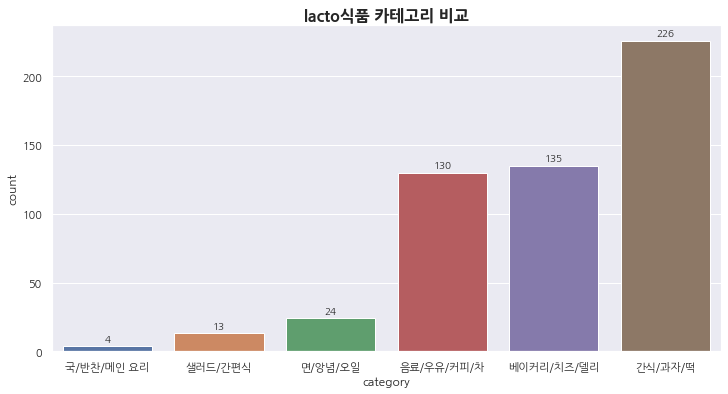

In [34]:
lacto_df=kurly[kurly['classify']=='lacto']
plt.figure(figsize=(12,6))
plt.title('lacto식품 카테고리 비교',fontdict=title_font)
ax=sns.countplot(x='category',data=lacto_df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

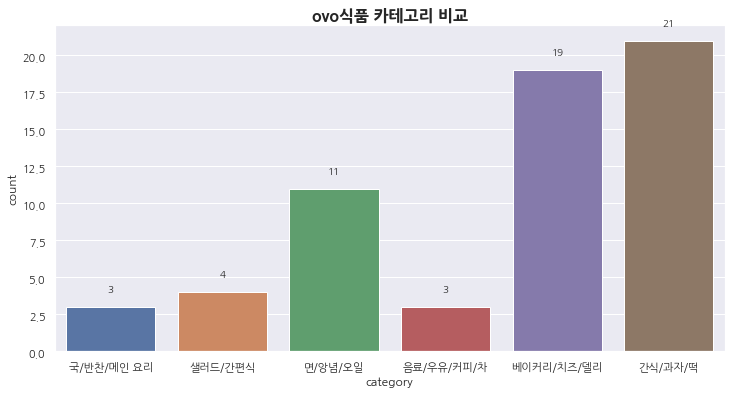

In [35]:
ovo_df=kurly[kurly['classify']=='ovo']
plt.figure(figsize=(12,6))
plt.title('ovo식품 카테고리 비교',fontdict=title_font)
ax=sns.countplot(x='category',data=ovo_df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+1,height,ha='center',size=10)
plt.show()

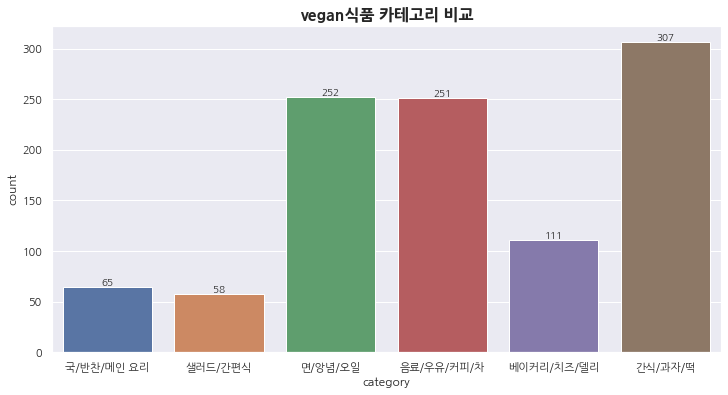

In [36]:
vegan_df=kurly[kurly['classify']=='vegan']
plt.figure(figsize=(12,6))
plt.title('vegan식품 카테고리 비교',fontdict=title_font)
ax=sns.countplot(x='category',data=vegan_df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+1,height,ha='center',size=10)
plt.show()

### 많이 등장하는 5개 브랜드 비건단계 비교

In [37]:
brand_count=Counter(kurly['brand'])
best_brand=pd.DataFrame()
for brand,cnt in brand_count.most_common()[:5]:
    sub=kurly[kurly['brand']==brand]
    best_brand=pd.concat([best_brand,sub])

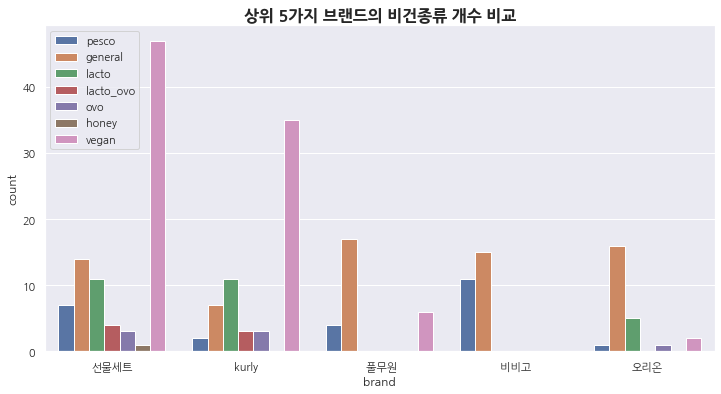

In [38]:
plt.figure(figsize=(12,6))
plt.title('상위 5가지 브랜드의 비건종류 개수 비교',fontdict=title_font)
sns.countplot(x='brand',hue='classify',data=best_brand)
plt.legend(loc='best')

### 비건단계당 브랜드 개수

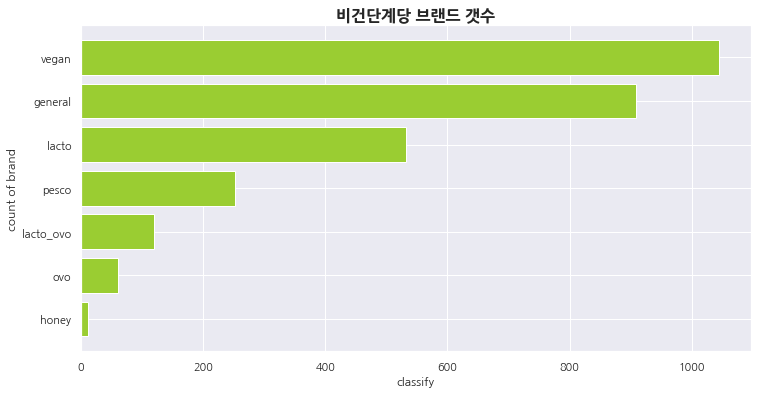

In [39]:
count_brand=kurly.groupby('classify').brand.count().sort_values()
label=count_brand.index.values

plt.figure(figsize=(12,6))
bar=plt.barh(label,count_brand,color='yellowgreen')
plt.title('비건단계당 브랜드 갯수',fontdict=title_font)
plt.xlabel('classify')
plt.ylabel('count of brand')
plt.show()

### 알레르기 워드클라우드

In [40]:
allergy=[]
for text in kurly['allergy']:
    text=text.replace("'",'')
    for word in text.split(','):
        allergy.append(word)
allergy=Counter(allergy)

(-0.5, 3907.5, 2474.5, -0.5)

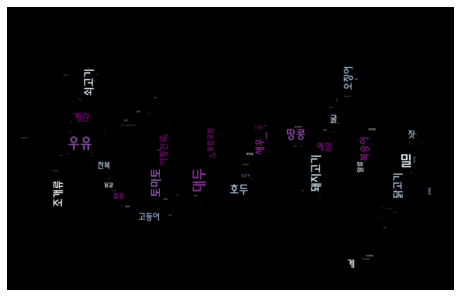

In [41]:
img = Image.open('./img/컬리.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='BuPu',mask=img_array,max_words=1000).generate_from_frequencies(allergy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

### 알레르기 유무 개수 차이

In [42]:
def allergy_yesno(allergy):
    if allergy=='없음':
        return 'no'
    else:
        return 'yes'
kurly['allergy_yes_no']=kurly['allergy'].apply(allergy_yesno)

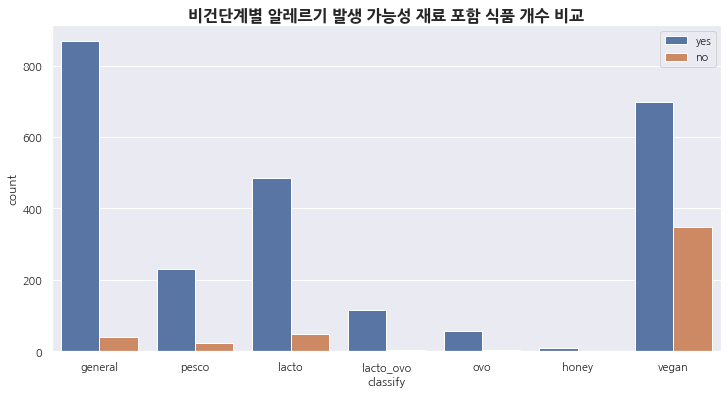

In [60]:
plt.figure(figsize=(12,6))
plt.title('비건단계별 알레르기 발생 가능성 재료 포함 식품 개수 비교',fontdict=title_font)
sns.countplot(x='classify',hue='allergy_yes_no',data=kurly)
plt.legend(loc='best')

### 글루텐 유무 개수 비교

In [65]:
def allergy_yesno(gluten):
    if gluten=='발견사항 없음':
        return 'no'
    else:
        return 'yes'
kurly['gluten_yes_no']=kurly['gluten'].apply(allergy_yesno)

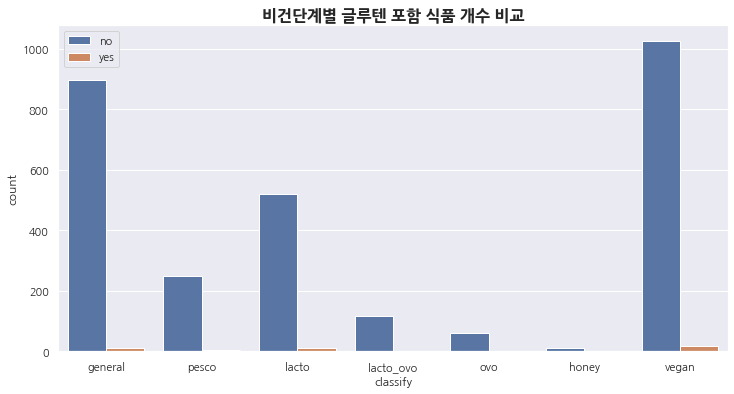

In [67]:
plt.figure(figsize=(12,6))
plt.title('비건단계별 글루텐 포함 식품 개수 비교',fontdict=title_font)
sns.countplot(x='classify',hue='gluten_yes_no',data=kurly)
plt.legend(loc='best')

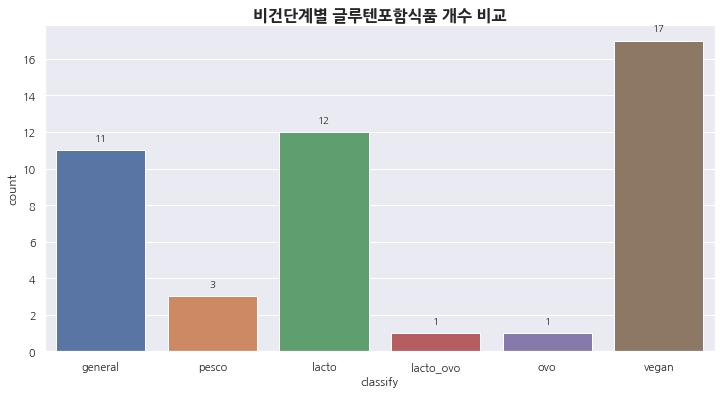

In [76]:
gluten_yes=kurly[kurly['gluten']!='발견사항 없음']
plt.figure(figsize=(12,6))
plt.title('비건단계별 글루텐포함식품 개수 비교',fontdict=title_font)
ax=sns.countplot(x='classify',data=gluten_yes)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+0.5,height,ha='center',size=10)
plt.show()

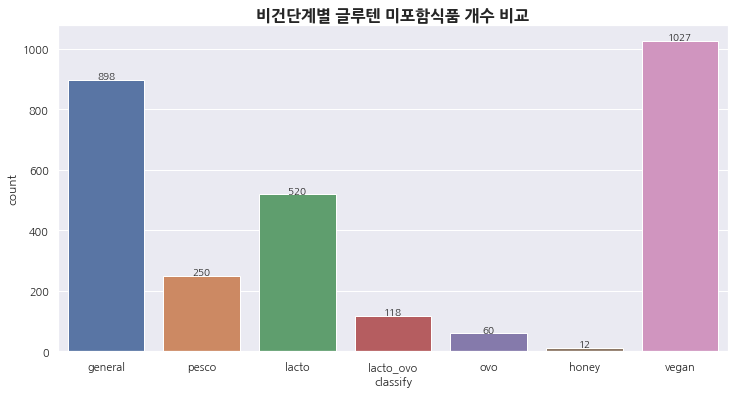

In [77]:
gluten_no=kurly[kurly['gluten']=='발견사항 없음']
plt.figure(figsize=(12,6))
plt.title('비건단계별 글루텐 미포함식품 개수 비교',fontdict=title_font)
ax=sns.countplot(x='classify',data=gluten_no)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+1,height,ha='center',size=10)
plt.show()

## 올리브영

### 데이터 및 리스트

In [5]:
olive=pd.read_csv('./data/olive0_classify_allergy_gluten.csv')
olive

,brand,product,text,cate,animal,allergy,gluten
0,랩시리즈,랩시리즈 올인원 트리트먼트 50ml 1+1 기획세트,"사이클로덱스트린,포타슘스테아레이트,포도씨추출물,스쿠알란,옥틸도데실네오펜타노에이트,에...",스킨케어,1,발견사항 없음,발견사항 없음
1,유세린,유세린 하이알루론 아이크림X나이트크림 기획(아이크림 15ml+나이트크림 50ml+컨...,"에칠헥실리세린,부틸렌라이콜디카프릴레이트,이소프로필팔미테이트,하이드로제네이티드코코리세...",스킨케어,1,발견사항 없음,발견사항 없음
2,아이디얼포맨,아이디얼 포맨 퍼펙트스킨케어 2종세트(미니어처 3종 증정),"페닐알라닌,무화과추출물,홀리바질잎추출물,나이아신아마이드,카프릴릭,다이소듐이디티에이,...",스킨케어,1,"부틸페닐메틸프로피오날,리모넨,리날룰",발견사항 없음
3,다슈,다슈 맨즈 아쿠아 토너/로션 153ml 2종 세트(+토너&로션&클렌징 30ml증정),"개청각추출물,연꽃씨추출물,바실러스,마트리카리아꽃추출물,띠뿌리발효추출물,페닐알라닌,민...",스킨케어,1,"부틸페닐메틸프로피오날,리모넨,리날룰",발견사항 없음
4,달바,달바 화이트 트러플 퍼스트 아로마틱 토너 155ml,"네오펜틸글라이콜다이헵타노에이트,하이드록시에틸우레아,돌콩오일,브로멜라인,소듐클로라이드...",스킨케어,1,"리날룰,리모넨,헥실신남알",발견사항 없음
...,...,...,...,...,...,...,...
3748,데싱디바,데싱디바 매직프레스 베이스 쉴드,"토코페롤,스위트아몬드오일,아이소프로필알코올,해바라기씨오일,포스포릭애씨드,실리카,트라...",네일,0,발견사항 없음,발견사항 없음
3749,엣지유,엣지유 샵케어 탑젤 글로시&매트,"유칼립투스잎추출물,하이드록시사이클로헥실페닐케톤,셀룰로오스아세테이트부티레이트,헤마,매...",네일,0,발견사항 없음,발견사항 없음
3750,데싱디바,데싱디바 리치 세럼,"벤질살리실레이트,포도씨오일,미네랄오일,스타이렌코폴리머,부틸렌,에틸렌,부틸페닐메틸프로...",네일,0,"벤질살리실레이트,부틸페닐메틸프로피오날,헥실신남알",발견사항 없음
3751,위드샨,위드샨 에코 네일 리무버 200ml,"제라니올,리날룰,프로필렌글라이콜,정제수,라벤더오일,토코페릴아세테이트,오레가노오일,로...",네일,0,"제라니올,리날룰,리모넨",발견사항 없음


In [45]:
with open("./list/check_lst.txt", "r") as file:
    lst = file.readlines()
check_lst=[]
for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        check_lst.append(word.replace(' ',''))

### 식물성/동물성 많이 등장한 성분들

동물성

In [46]:
animal=[]
for text in olive.loc[olive['animal']==1,'text']:
    text=text.replace("'",'')
    for word in text.split(','):
        if word in check_lst:
            animal.append(word.strip())
animal=Counter(animal)

(-0.5, 311.5, 284.5, -0.5)

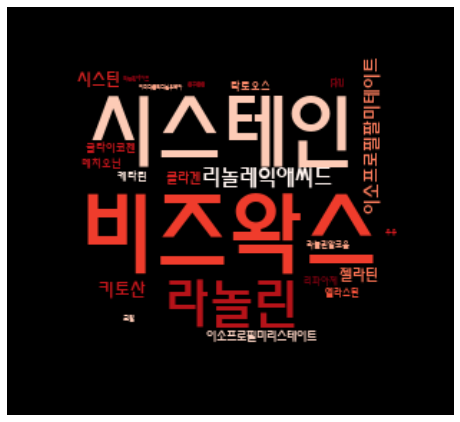

In [47]:
img = Image.open('./img/돼지.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='Reds',mask=img_array,max_words=1000).generate_from_frequencies(animal)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

식물성

In [48]:
plant=[]
for text in olive.loc[olive['animal']==0,'text']:
    text=text.replace("'",'')
    for word in text.split(','):
        plant.append(word.strip())
plant=Counter(plant)

(-0.5, 639.5, 639.5, -0.5)

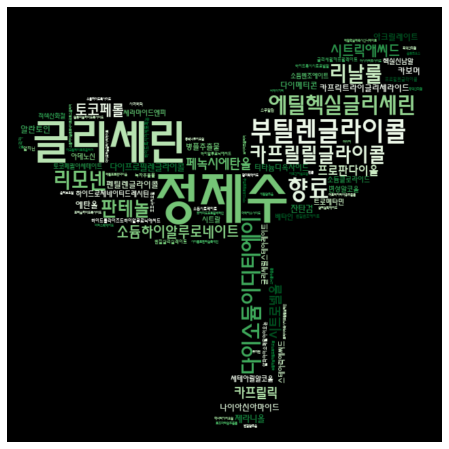

In [49]:
img = Image.open('./img/새싹.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='Greens',mask=img_array,max_words=1000).generate_from_frequencies(plant)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

### 동/식물성 상품 갯수

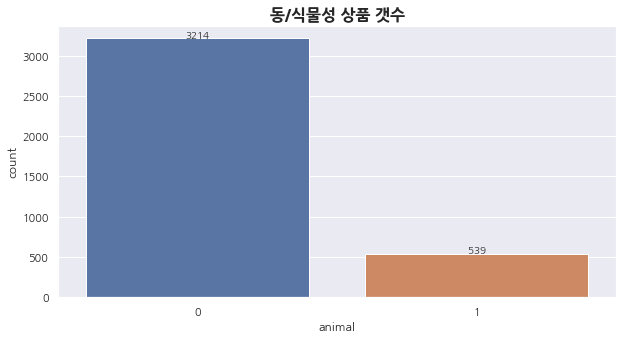

In [50]:
plt.figure(figsize=(10,5))
plt.title('동/식물성 상품 갯수',fontdict=title_font)
ax=sns.countplot(x='animal',data=olive)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,height,ha='center',size=10)
plt.show()

### 성분개수

In [51]:
def get_len(text):
    return len(text.split(','))

olive['text_len']=olive['text'].apply(get_len)
ingredient_cnt=Counter(olive['text_len'])

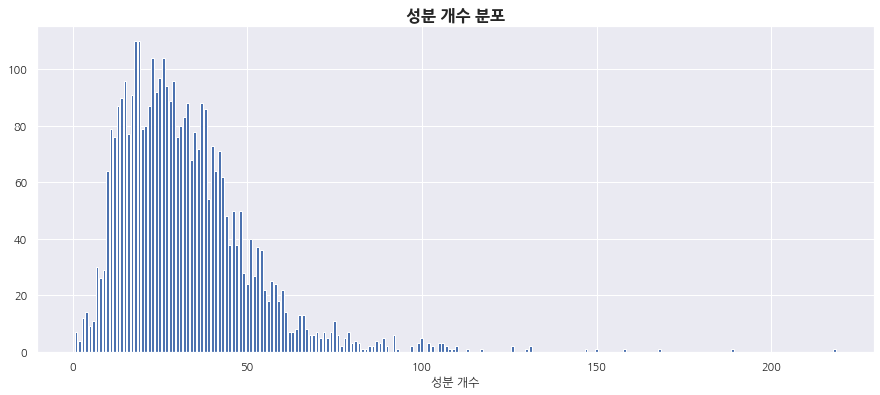

In [52]:
plt.figure(figsize=(15,6))
plt.title('성분 개수 분포',fontdict=title_font)
plt.bar(ingredient_cnt.keys(),ingredient_cnt.values())
plt.xlabel('성분 개수')
plt.show()

### 카테고리별 동물성/식물성 상품 갯수

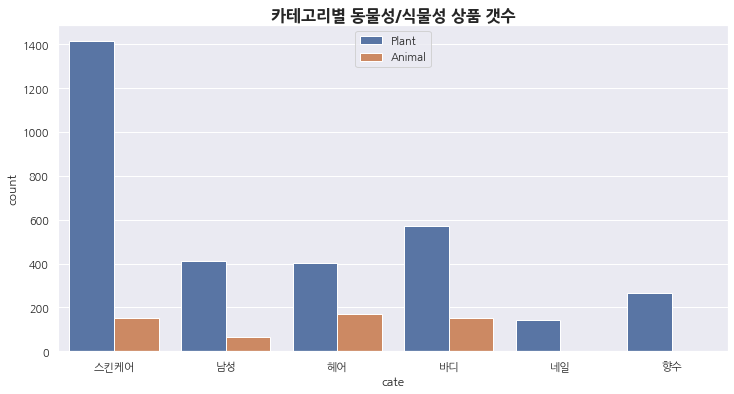

In [53]:
plt.figure(figsize=(12,6))
plt.title('카테고리별 동물성/식물성 상품 갯수',fontdict=title_font)
sns.countplot(x='cate',hue='animal',data=olive)
plt.legend(['Plant','Animal'],loc='best')

### 많이 등장하는 5개 브랜드 비교

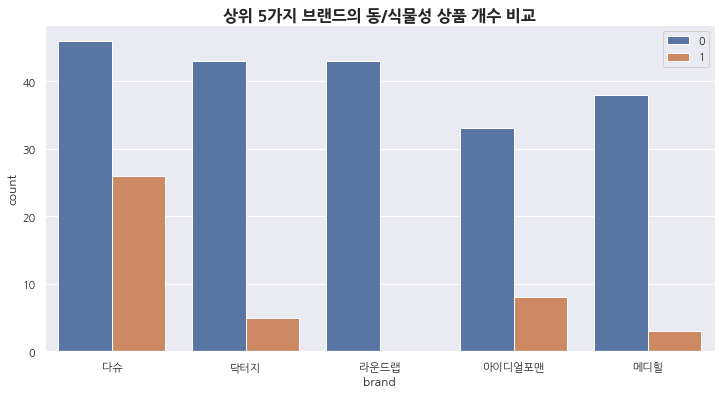

In [54]:
brand_count=Counter(olive['brand'])
best_brand=pd.DataFrame()
for brand,cnt in brand_count.most_common()[:5]:
    sub=olive[olive['brand']==brand]
    best_brand=pd.concat([best_brand,sub])

plt.figure(figsize=(12,6))
plt.title('상위 5가지 브랜드의 동/식물성 상품 개수 비교',fontdict=title_font)
sns.countplot(x='brand',hue='animal',data=best_brand)
plt.legend(loc='best')

### 동/식물성 상품 브랜드 갯수 비교

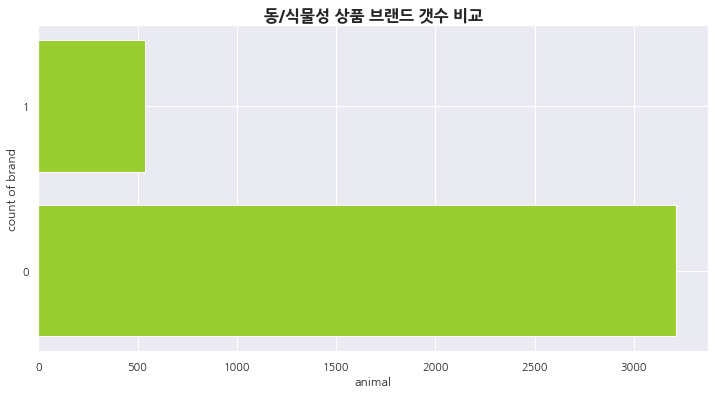

In [55]:
count_brand=olive.groupby('animal').brand.count().sort_values()
label=count_brand.index.values

plt.figure(figsize=(12,6))
bar=plt.barh(label,count_brand,color='yellowgreen')
plt.title('동/식물성 상품 브랜드 갯수 비교',fontdict=title_font)
plt.xlabel('animal')
plt.ylabel('count of brand')
plt.yticks([0,1])
plt.show()

### 알레르기 워드클라우드

In [56]:
allergy=[]
for text in olive['allergy']:
    text=text.replace("'",'')
    for word in text.split(','):
        allergy.append(word)
allergy=Counter(allergy)

(-0.5, 565.5, 565.5, -0.5)

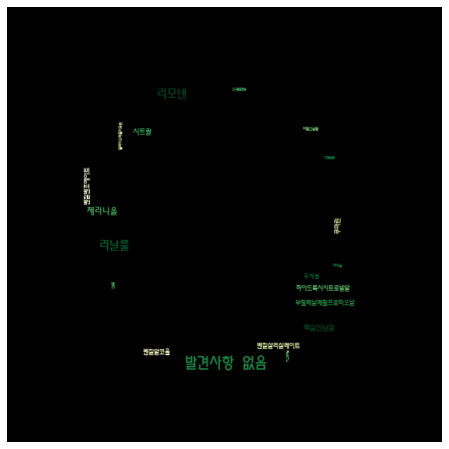

In [57]:
img = Image.open('./img/올리브영.jpg')
img_array = np.array(img)
wordcloud = WordCloud(font_path = 'HMFMMUEX.TTC',background_color='black', colormap='YlGn',mask=img_array,max_words=1000).generate_from_frequencies(allergy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

### 알레르기 유무 개수 차이

In [58]:
def allergy_yesno(allergy):
    if allergy=='발견사항 없음':
        return 'no'
    else:
        return 'yes'
olive['allergy_yes_no']=olive['allergy'].apply(allergy_yesno)

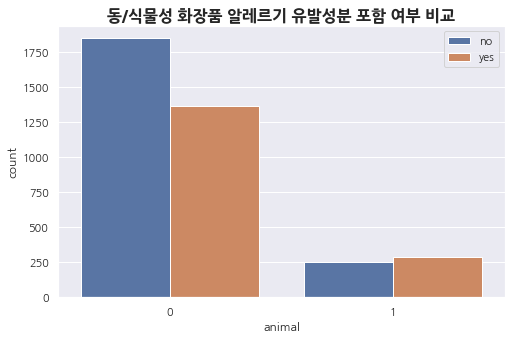

In [59]:
plt.figure(figsize=(8,5))
plt.title('동/식물성 화장품 알레르기 유발성분 포함 여부 비교',fontdict=title_font)
sns.countplot(x='animal',hue='allergy_yes_no',data=olive)
plt.legend(loc='best')